Istruzioni per importare le librerie python. Definizione di una funzione per mostrare le immagini durante l'analisi. Lettura dell'immagine da file .jpg

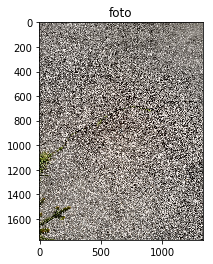

In [145]:
import numpy as np
import scipy.ndimage as nd
import imageio
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

def mostra_immagine(img, titolo):
    plt.imshow(img)
    plt.title(titolo)
    plt.show()

img = imageio.imread("/Users/TeoPro/Desktop/strade/strada4.jpg")
mostra_immagine(img, "foto")

E' necessario ritagliare l'immagine in modo che resti solo una parte dell'asfalto interessante per l'analisi. Per fare questo in questo caso si taglia metà dell'immagine (quella sottostante) rimuovendo la parte alta ed i lati della strada, viene anche rimosso un 10% della parte inferiore dell'immagine. Variando sui parametri si può fare tagli in modo diverso sulla base della modalità delle acquisizioni fatte.

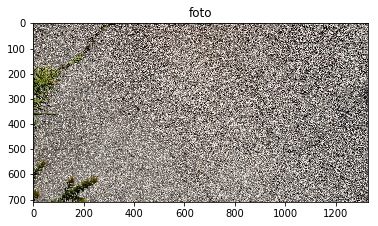

In [146]:
nrow, ncol = img.shape[:2]
img = img[nrow//2:(nrow-nrow//10),:,:]
mostra_immagine(img, "foto")

E' necessario l'applicazione di un sistema di filtraggio per la riduzinone del rumore dell'immagine.

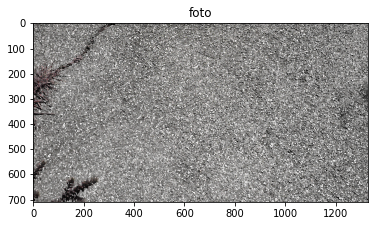

In [147]:
md = nd.filters.median_filter
md_blurPhoto = md(img, 5)
mostra_immagine(md_blurPhoto, "foto")

E' necessario convertire l'immagine da formato RGB a formato HSV in modo da rendere i difetti facilmente riconoscibili.

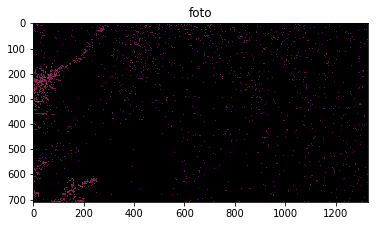

In [148]:
lower = np.array([0, 10, 50])
upper = np.array([360, 100, 100])
hls = cv2.cvtColor(md_blurPhoto, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hls, lower, upper)
res = cv2.bitwise_and(hls, hls, mask = mask)
mostra_immagine(res, "foto")

A questo punto si devono detettare i difetti rimasti, ridurre il rumore attorno ad essi mantenendo le linee oltre una soglia di rumore. Al termine dell'analisi' è possibile quantificare il punteggio di difetti presenti.

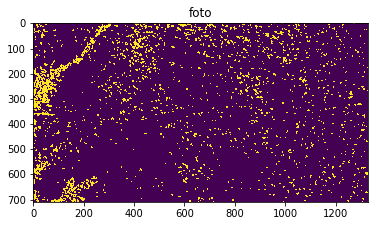

0.0759078429437279

In [149]:
#detezione dei difetti (linee) rimasti in modo da poter estrarre i difetti dell'asfalto
edges_cv = cv2.Canny(res, 200, 400)

#riduzione rumore attorno alle linee
blurred_edges = cv2.GaussianBlur(edges_cv,(3,3),0) 

#mantenere le linee oltre una certa soglia di rumore 
bdilation = nd.morphology.binary_dilation
berosion = nd.morphology.binary_erosion
edges_cv_2 = bdilation(berosion(blurred_edges, iterations=2), iterations=2)

mostra_immagine(edges_cv_2, "foto")

defect_score = edges_cv_2.mean()
defect_score